In [1]:
import gpr

import numpy as np
from scipy.optimize import minimize

hoid = True
folio2 = False

In [2]:
# """Synthetic Data"""
# theta_true = np.array([250, 0.6, 0.08, np.pi/3, 10])
# theta0 = np.array([100, 1, 1, 0, 1])

# GP = gpr.GPR(
#     hoid=hoid,
#     folio2=folio2,
#     verbose=False,
#     nLML_factor=-1,
#     nLML_print=False,
#     random_state=0,
#     tensor=False)

# GP.gen_synthetic_data(5000, theta_true)
# GP.remove_outliers(3, plot=False, verbose=False)
# GP.split_data(0.20)

# GP.fit(theta_true)

Extracting fits file...
Filename: /media/data/austinfortino/austinFull.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  Exposures     1 BinTableHDU     47   2820R x 19C   [1D, 1D, 4A, 1D, 8A, 1D, 1J, 1J, 1D, 1D, 8A, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  2  RESIDUALS     1 BinTableHDU     25   73818788R x 8C   ['I', 'J', 'D', 'D', 'D', 'D', 'D', 'L']   

Extracting data from exposure 500...
Removing data points that have residuals greater than 1 standard deviations from the mean...


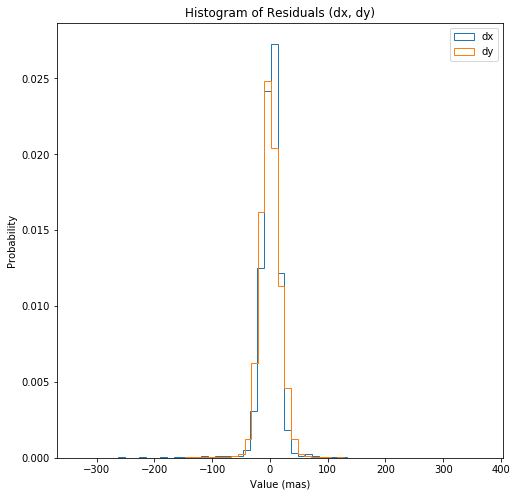

66.4069% (10993) data points are being kept.


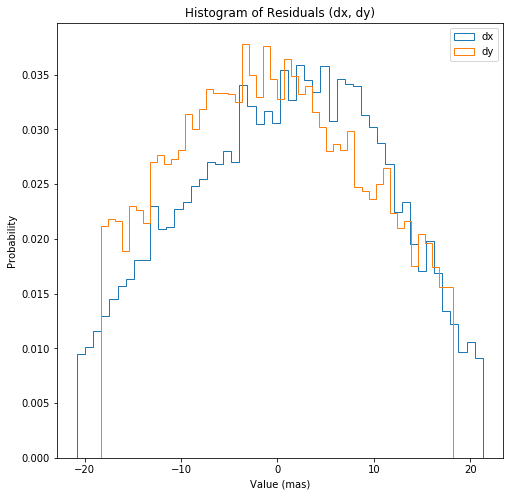

Splitting data into training and testing sets...
Generating elliptical covariance function...
Generating white noise covariance function...
Solving for posterior...
Posterior solved for in 5.4754111766815186 seconds.


In [3]:
"""Real Data"""
theta0 = np.array([100, .1, .1, 0, 4])

GP = gpr.GPR(
    hoid=hoid,
    folio2=folio2,
    verbose=True,
    nLML_factor=-1,
    nLML_print=True,
    random_state=0,
    tensor=False)

GP.extract_exposure()
# sample = np.array([-0.5, 0, 0, 0.5])
sample = None
GP.extract_data(sample=sample)

GP.remove_outliers(1, plot=True)
GP.split_data(0.20)

GP.fit(theta0)

Current Log Marginal Likelihood: -84506.25864125439
Fraction of test points within 1 standard deviation(s) of posterior predictive mean:
dx: 0.07503410641200546; dy: 0.06412005457025921
Chisq dx: 95720.47572828797; Chisq dy: 108396.69469369916


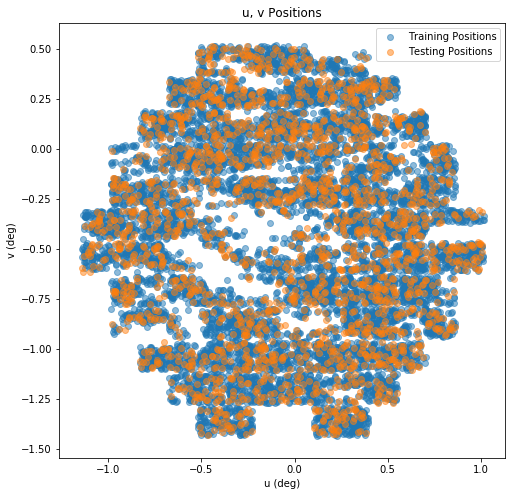

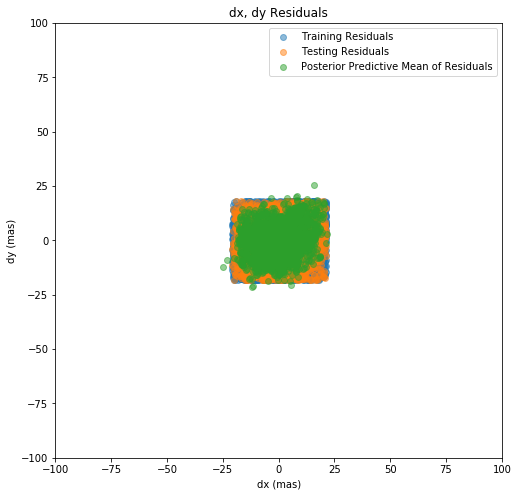

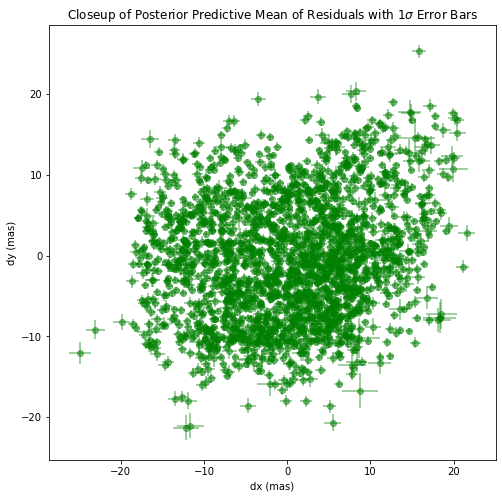

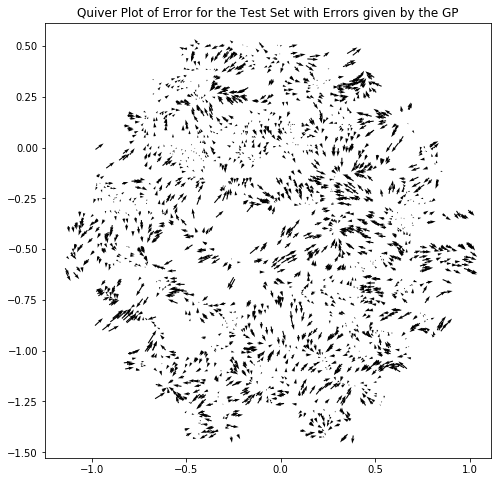

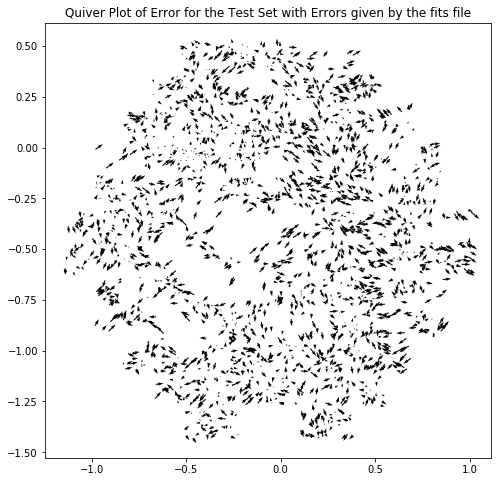

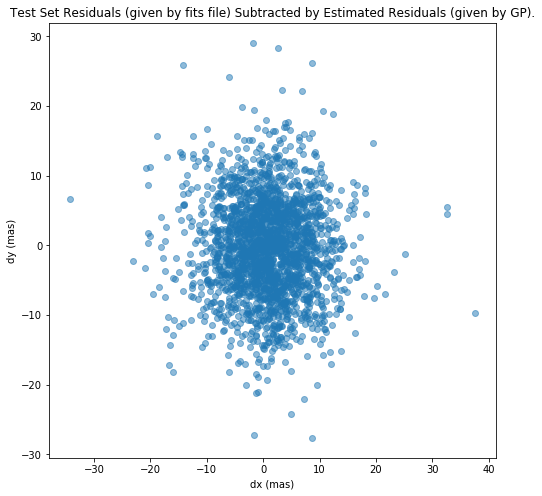

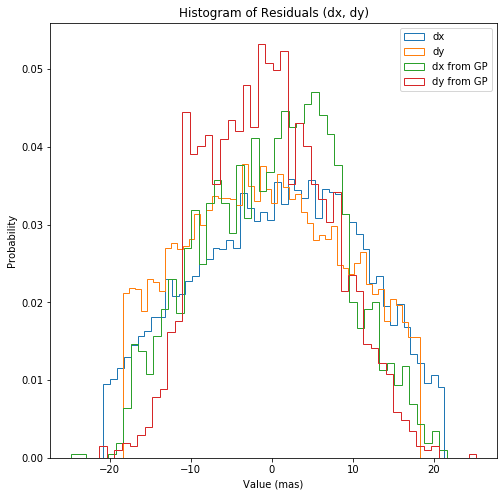

In [4]:
GP.summary()

In [ ]:
GP.verbose = False
bounds = np.array([(1e-5, 1e5), (1e-3, 100), (1e-3, 100), (-np.inf, np.inf), (1e-5, 1e5)])
result = minimize(GP.get_nLML, theta0, method='L-BFGS-B', bounds=bounds, options={'eps': 0.01, 'maxfun': 500})

print(result.x)
print(theta_true)

 100.00000 mas    0.10000 deg    0.10000 deg    0.00000 deg    4.00000 mas2
 100.01000 mas    0.10000 deg    0.10000 deg    0.00000 deg    4.00000 mas2
 100.00000 mas    0.11000 deg    0.10000 deg    0.00000 deg    4.00000 mas2
 100.00000 mas    0.10000 deg    0.11000 deg    0.00000 deg    4.00000 mas2
 100.00000 mas    0.10000 deg    0.10000 deg    0.57296 deg    4.00000 mas2
 100.00000 mas    0.10000 deg    0.10000 deg    0.00000 deg    4.01000 mas2
 100.00257 mas    0.09999 deg    0.09999 deg   -0.00000 deg    5.00000 mas2
 100.01257 mas    0.09999 deg    0.09999 deg   -0.00000 deg    5.00000 mas2
 100.00257 mas    0.10999 deg    0.09999 deg   -0.00000 deg    5.00000 mas2
 100.00257 mas    0.09999 deg    0.10999 deg   -0.00000 deg    5.00000 mas2
 100.00257 mas    0.09999 deg    0.09999 deg    0.57296 deg    5.00000 mas2
 100.00257 mas    0.09999 deg    0.09999 deg   -0.00000 deg    5.01000 mas2
 100.00269 mas    0.02386 deg    0.00100 deg   -0.00000 deg    5.03669 mas2
 100.01269 m

In [ ]:
theta = np.array([9.99899217e+01, 2.94291195e-02, 1.27768096e-02, -1.4e-1, 4.08811837e+00])
GP.fit(theta)
GP.summary()